<a href="https://colab.research.google.com/github/CliffBooth/telecom_labs/blob/main/code/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Get thinkdsp.py
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
from thinkdsp import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

--2022-04-17 11:41:30--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-04-17 11:41:30--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2022-04-17 11:41:31 (4.73 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



# **Лабораторная работа №4**

**Exercise #4.1**

A Soft Murmur” is a web site that plays a mixture of natural
noise sources, including rain, waves, wind, etc. At http://asoftmurmur.
com/about/ you can find their list of recordings, most of which are at http:
//freesound.org.
Download a few of these files and compute the spectrum of each signal. Does
the power spectrum look like white noise, pink noise, or Brownian noise? How
does the spectrum vary over time?

Скачаем файл со звуком дождя и грозы:

In [8]:
if not os.path.exists("thunderstorm.wav"):
  !wget https://github.com/CliffBooth/telecom_labs/raw/main/samples/thunderstorm.wav
wave = read_wave('thunderstorm.wav')
wave.make_audio()

--2022-04-17 11:53:49--  https://github.com/CliffBooth/telecom_labs/raw/main/samples/thunderstorm.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CliffBooth/telecom_labs/main/samples/thunderstorm.wav [following]
--2022-04-17 11:53:50--  https://raw.githubusercontent.com/CliffBooth/telecom_labs/main/samples/thunderstorm.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10584044 (10M) [application/octet-stream]
Saving to: ‘thunderstorm.wav’

thunderstorm.wav    100%[===================>]  10.09M  --.-KB/s    in 0.1s    

2022-04-17 11:53:50 (99.3 MB/s) - ‘thunderstorm.wav’ saved [10584044/10

Выберем небольшой фрагмент:

In [9]:
segment = wave.segment(start=1.5, duration=1.0)
segment.make_audio()

Спектр:

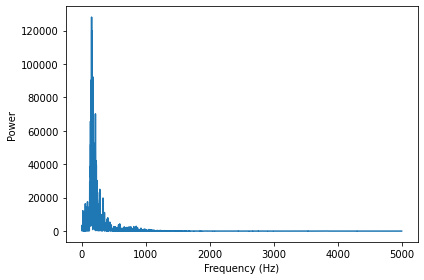

In [12]:
spectrum = segment.make_spectrum()
spectrum.plot_power(high=5000)
decorate(xlabel='Frequency (Hz)', ylabel='Power')

С увиличением частоты амплитуда резко падает, что похоже на розовый шум. Построим график в логарифмическом масштабе:

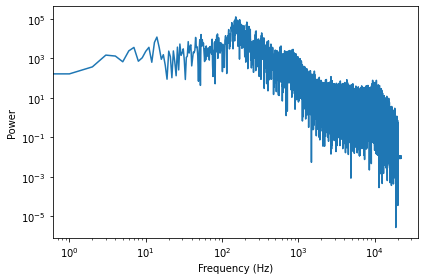

In [13]:
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

Чтобы увидеть, как меняется спектр с течением времени, выберем другой сегмент и построим графики обоих сегментов:

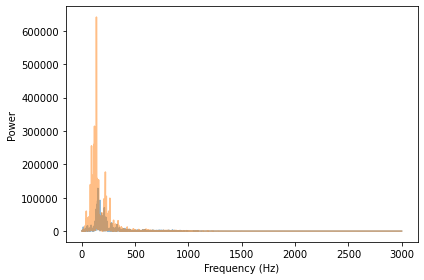

In [18]:
segment2 = wave.segment(start=2.5, duration=1.0)
segment2.make_audio()
spectrum2 = segment2.make_spectrum()
spectrum.plot_power(alpha=0.5, high=3000)
spectrum2.plot_power(alpha=0.5, high=3000)
decorate(xlabel='Frequency (Hz)', ylabel='Power')

В логарифмическом масштабе:

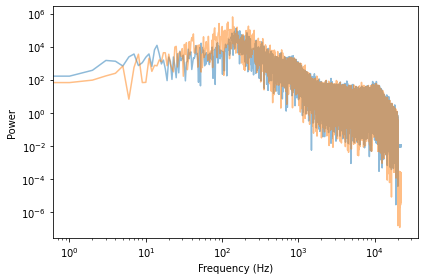

In [19]:
spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

Можно сделать вывод, что форма графика остается одинаковой с течением времени.

**Exercise #4.2**

In a noise signal, the mixture of frequencies changes over time.
In the long run, we expect the power at all frequencies to be equal, but in any
sample, the power at each frequency is random.
To estimate the long-term average power at each frequency, we can break a
long signal into segments, compute the power spectrum for each segment, and
then compute the average across the segments. You can read more about this
algorithm at http://en.wikipedia.org/wiki/Bartlett’s_method.
Implement Bartlett’s method and use it to estimate the power spectrum for a
noise wave. Hint: look at the implementation of make_spectrogram.

Нужно разложить сигнал на сегменты, после этого для каждого сегмента вычислить квадрат спектра, сложить их все, разделить на количество и взять корень.

In [20]:
def bartlett_method(wave, seg_length=512, win_flag=True):
    spectrogram = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectrogram.spec_map.values()
    psds = [spectrum.power for spectrum in spectrums]
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    return Spectrum(hs, fs, wave.framerate)

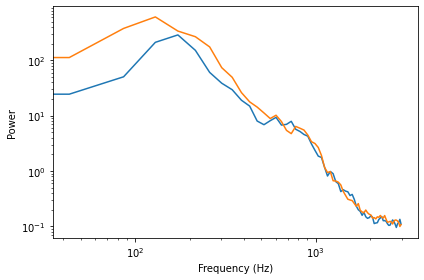

In [27]:
bartlett1 = bartlett_method(segment, 1024)
bartlett2 = bartlett_method(segment2, 1024)
bartlett1.plot_power(high=3000)
bartlett2.plot_power(high=3000)
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

Видно, что отношение между квадратом амплитуды и частотой сохраняется на разных сегментах.

**Exercise #4.3**

At http://www.coindesk.com you can download the daily price
of a BitCoin as a CSV file. Read this file and compute the spectrum of BitCoin
prices as a function of time. Does it resemble white, pink, or Brownian noise?

Загрузим csv файл с ценами на биткоин за каждые 3 дня с 2015 по 2022 года:

In [28]:
  if not os.path.exists('bitcoin.csv'):
    !wget https://github.com/CliffBooth/telecom_labs/raw/main/samples/bitcoin.csv

--2022-04-17 13:14:05--  https://github.com/CliffBooth/telecom_labs/raw/main/samples/bitcoin.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CliffBooth/telecom_labs/main/samples/bitcoin.csv [following]
--2022-04-17 13:14:05--  https://raw.githubusercontent.com/CliffBooth/telecom_labs/main/samples/bitcoin.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23697 (23K) [text/plain]
Saving to: ‘bitcoin.csv’

bitcoin.csv         100%[===================>]  23.14K  --.-KB/s    in 0.001s  

2022-04-17 13:14:05 (16.9 MB/s) - ‘bitcoin.csv’ saved [23697/23697]



In [31]:
import pandas as pd
csv = pd.read_csv('bitcoin.csv', parse_dates=[0])
csv

Timestamp  market-price
0   2015-01-02        314.81
1   2015-01-05        263.17
2   2015-01-08        297.99
3   2015-01-11        275.97
4   2015-01-14        222.00
..         ...           ...
848 2021-12-20      46689.28
849 2021-12-23      48628.35
850 2021-12-26      50470.89
851 2021-12-29      47601.26
852 2022-01-01      46249.56

[853 rows x 2 columns]

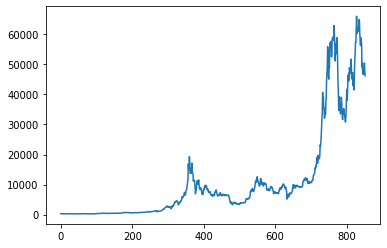

In [32]:
ys = csv['market-price']
ts = csv.index
wave = Wave(ys, ts, framerate=1)
wave.plot()

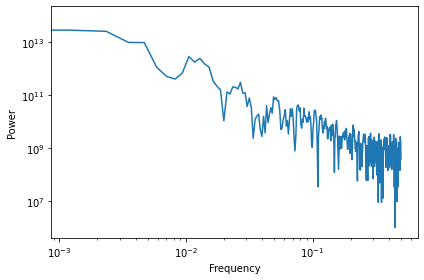

In [33]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency', ylabel='Power', **loglog)

In [34]:
spectrum.estimate_slope()[0]

-1.8707327981737178

Уклон спектра мощности равен примерно -1.87, так что это очень близко к красному шуму.

**Exercise #4.4**

A Geiger counter is a device that detects radiation. When an
ionizing particle strikes the detector, it outputs a surge of current. The total
output at a point in time can be modeled as uncorrelated Poisson (UP) noise,
where each sample is a random quantity from a Poisson distribution, which
corresponds to the number of particles detected during an interval.
Write a class called UncorrelatedPoissonNoise that inherits from
thinkdsp._Noise and provides evaluate. It should use np.random.poisson
to generate random values from a Poisson distribution. The parameter of this
function, lam, is the average number of particles during each interval. You can
use the attribute amp to specify lam. For example, if the framerate is 10 kHz
and amp is 0.001, we expect about 10 “clicks” per second.
Generate about a second of UP noise and listen to it. For low values of amp,
like 0.001, it should sound like a Geiger counter. For higher values it should
sound like white noise. Compute and plot the power spectrum to see whether
it looks like white noise.

In [38]:
class UncorrelatedPoissonNoise(Noise):
  def evaluate(self, ts):
    ys = np.random.poisson(self.amp, len(ts))
    return ys

In [39]:
amp = 0.001
framerate = 10_000
duration = 1
signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

Звук действительно очень похож на счетчик Гейгера.

Посмотрим на график волны:

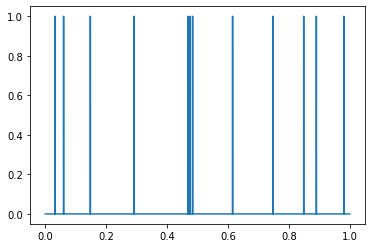

In [40]:
wave.plot()

График спектра в логарифмическом масштабе:

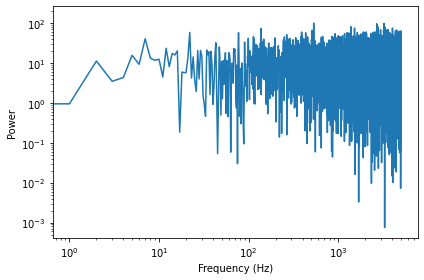

In [41]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

При увеличении апмлитуды, сигнал будет звучать как белый шум:

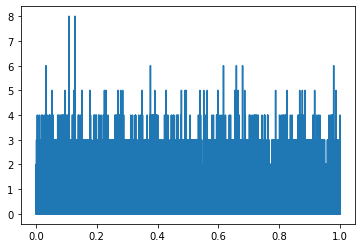

In [43]:
amp = 1
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()
wave.plot()

**Exercise #4.5**

The algorithm in this chapter for generating pink noise is conceptually simple but computationally expensive. There are more efficient alternatives, like the Voss-McCartney algorithm. Research this method, implement it, compute the spectrum of the result, and confirm that it has the desired relationship between power and frequency.

In [45]:
def voss(nrows, ncols=16):
  array = np.empty((nrows, ncols))
  array.fill(np.nan)
  array[0, :] = np.random.random(ncols)
  array[:, 0] = np.random.random(nrows)
  n = nrows
  cols = np.random.geometric(0.5, n)
  cols[cols >= ncols] = 0
  rows = np.random.randint(nrows, size=n)
  array[rows, cols] = np.random.random(n)
  df = pd.DataFrame(array)
  df.fillna(method='ffill', axis=0, inplace=True)
  total = df.sum(axis=1)
  return total.values

Используя Voss-McCartney алгоритм, сгенерируем 11025 значений и создадим волну:

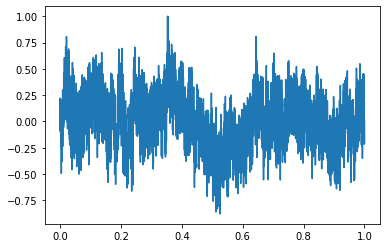

In [48]:
ys = voss(11025)
wave = Wave(ys)
wave.unbias()
wave.normalize()
wave.plot()
wave.make_audio()

Спектр волны:

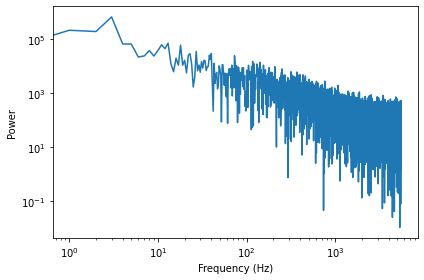

In [51]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)